## Contents
1) Import Libraries and Data
2) Data Cleaning
3) Regression Analysis Data Prep
4) Regression Analysis
5) Regression Analysis without Outliers
6) Comparing Regression Fit to Training Set (With Outliers)
7) Thoughts on Model Overall Performance

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Created graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating path

path='C:/Users/Drew/Superstore'

In [4]:
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','product_sales_cleaned.csv'))

### 2. Data Cleaning

In [5]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'total_orders',
       'buyer_behavior_segment'],
      dtype='object')

In [6]:
df.head(20)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders,buyer_behavior_segment
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,5,Occasional Buyer
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,5,Occasional Buyer
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,9,Occasional Buyer
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,15,Consistent Buyer
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,15,Consistent Buyer
5,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.00,14.17,24,Loyal Buyers
6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,4,0.00,1.97,24,Loyal Buyers
7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.15,6,0.20,90.72,24,Loyal Buyers
8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3,0.20,5.78,24,Loyal Buyers
9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,...,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5,0.00,34.47,24,Loyal Buyers


In [7]:
df.shape

(9993, 21)

In [8]:
df.dtypes

order_id                   object
order_date                 object
ship_date                  object
ship_mode                  object
customer_id                object
customer_segment           object
country                    object
city                       object
state                      object
postal_code                 int64
region                     object
product_id                 object
category                   object
sub_category               object
product_name               object
sales                     float64
quantity                    int64
discount                  float64
profit                    float64
total_orders                int64
buyer_behavior_segment     object
dtype: object

#### Missing Values

In [9]:
df.isnull().sum()

order_id                  0
order_date                0
ship_date                 0
ship_mode                 0
customer_id               0
customer_segment          0
country                   0
city                      0
state                     0
postal_code               0
region                    0
product_id                0
category                  0
sub_category              0
product_name              0
sales                     0
quantity                  0
discount                  0
profit                    0
total_orders              0
buyer_behavior_segment    0
dtype: int64

#### Duplicate Check

In [10]:
dups=df.duplicated()

In [11]:
dups.shape

(9993,)

#### No duplicates found

#### Extreme Values Check

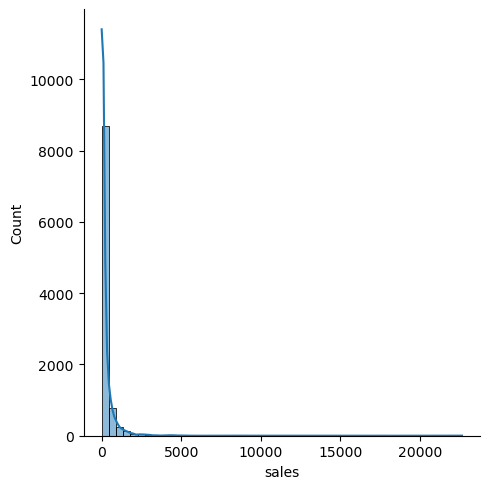

In [12]:
# Showing extreme values of sales column

sns.displot(df['sales'],bins=50,kde=True)

In [13]:
# Checking mean of sales

df['sales'].mean()

229.8528670069048

In [14]:
# Checking median of sales

df['sales'].median()

54.48

In [15]:
# Checking min value of sales

df['sales'].min()

0.44

In [16]:
# Checking max value of sales

df['sales'].max()

22638.48

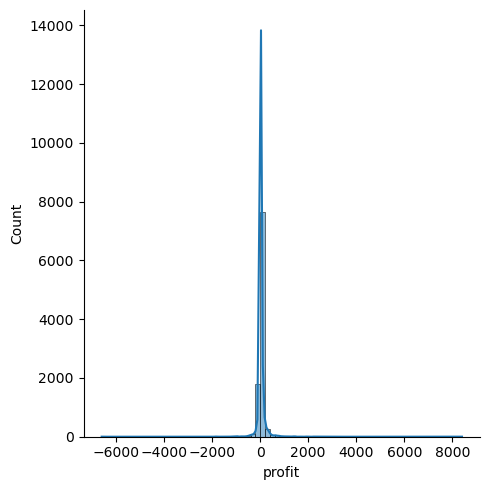

In [17]:
# Showing extreme values of profit

sns.displot(df['profit'],bins=75,kde=True)

In [18]:
# Checking mean of profit

df['profit'].mean()

28.661047733413387

In [19]:
df['profit'].median()

8.67

In [20]:
df['profit'].min()

-6599.98

In [21]:
df['profit'].max()

8399.98

### 3) Data Prep for Regression Analysis

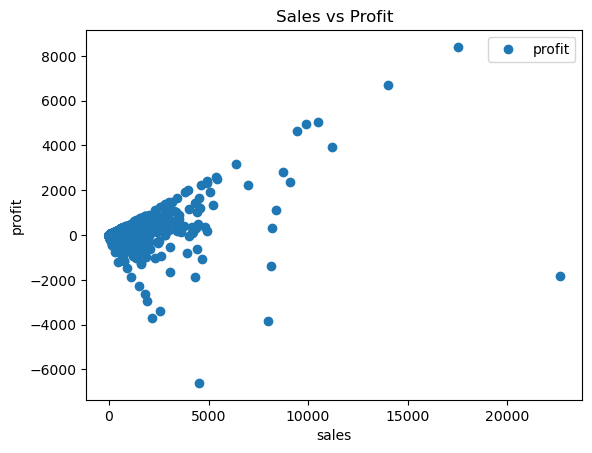

In [51]:
# Creating scatterplot using matplotlib for profit and total orders

df.plot(x='sales',y='profit',style='o')
plt.title('Sales vs Profit')
plt.xlabel('sales')
plt.ylabel('profit')
plt.show()

In [33]:
np.set_printoptions(threshold=np.inf)

In [52]:
# Reshaping variables into Numpy arrays and then putting into separate objects

X=df['sales'].values.reshape(-1,1)
y=df['profit'].values.reshape(-1,1)

In [53]:
X

array([[2.619600e+02],
       [7.319400e+02],
       [1.462000e+01],
       [9.575800e+02],
       [2.237000e+01],
       [4.886000e+01],
       [7.280000e+00],
       [9.071500e+02],
       [1.850000e+01],
       [1.149000e+02],
       [1.706180e+03],
       [9.114200e+02],
       [1.555000e+01],
       [4.079800e+02],
       [6.881000e+01],
       [2.540000e+00],
       [6.658800e+02],
       [5.550000e+01],
       [8.560000e+00],
       [2.134800e+02],
       [2.272000e+01],
       [1.946000e+01],
       [6.034000e+01],
       [7.137000e+01],
       [1.044630e+03],
       [1.165000e+01],
       [9.057000e+01],
       [3.083430e+03],
       [9.620000e+00],
       [1.242000e+02],
       [3.260000e+00],
       [8.630000e+01],
       [6.860000e+00],
       [1.576000e+01],
       [2.947000e+01],
       [1.097540e+03],
       [1.909200e+02],
       [1.133300e+02],
       [5.324000e+02],
       [2.120600e+02],
       [3.711700e+02],
       [1.471700e+02],
       [7.788000e+01],
       [9.5

In [54]:
y

array([[ 4.19100e+01],
       [ 2.19580e+02],
       [ 6.87000e+00],
       [-3.83030e+02],
       [ 2.52000e+00],
       [ 1.41700e+01],
       [ 1.97000e+00],
       [ 9.07200e+01],
       [ 5.78000e+00],
       [ 3.44700e+01],
       [ 8.53100e+01],
       [ 6.83600e+01],
       [ 5.44000e+00],
       [ 1.32590e+02],
       [-1.23860e+02],
       [-3.82000e+00],
       [ 1.33200e+01],
       [ 9.99000e+00],
       [ 2.48000e+00],
       [ 1.60100e+01],
       [ 7.38000e+00],
       [ 5.06000e+00],
       [ 1.56900e+01],
       [-1.02000e+00],
       [ 2.40260e+02],
       [ 4.22000e+00],
       [ 1.17700e+01],
       [-1.66505e+03],
       [-7.05000e+00],
       [ 1.55300e+01],
       [ 1.10000e+00],
       [ 9.71000e+00],
       [-5.72000e+00],
       [ 3.55000e+00],
       [ 9.95000e+00],
       [ 1.23470e+02],
       [-1.47960e+02],
       [ 3.54200e+01],
       [-4.69800e+01],
       [-1.51500e+01],
       [ 4.17600e+01],
       [ 1.65600e+01],
       [ 3.89000e+00],
       [ 9.

In [55]:
# Splitting data into training and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### 4) Regression Analysis

In [56]:
# Creating regression object to fit onto training set

regression=LinearRegression()

In [57]:
# Fitting regression object to training set

regression.fit(X_train,y_train)

LinearRegression()

In [58]:
# Predicting values of y using x

y_predicted=regression.predict(X_test)

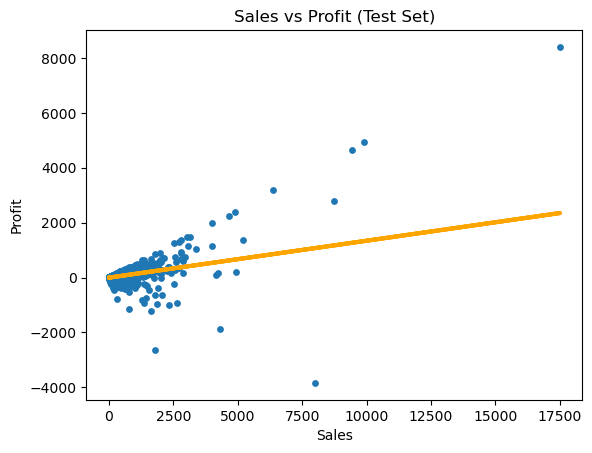

In [59]:
# Creating plot to show regression line from model on test set

plot_test=plt
plot_test.scatter(X_test,y_test,s=15)
plot_test.plot(X_test,y_predicted,color='orange',linewidth=3)
plot_test.title('Sales vs Profit (Test Set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [97]:
# Creating objects containing model summary statistics

rmse=mean_squared_error(y_test,y_predicted)
r2=r2_score(y_test,y_predicted)

In [98]:
# Model summary statistic results to evaluate model performance

print('Slope:',regression.coef_)
print('Mean squared error:',rmse)
print('R2 score:',r2)

Slope: [[0.13446275]]
Mean squared error: 51403.63700236659
R2 score: 0.31278282927043055


### Result analysis
1) slope: shows a positive slope indicating a positive relationship and as sales rise, Profit generally rises.
2) Mean squared error: Based on the large range of sales, with some being as high as 8400 and as low as -6600, the resulted MSE should be acceptable. This was also determined when looking at the RSME which should be around 227.
3) R2 Score: results show around 31.28%. This result is low and could be affected by other factors the model is not portraying.

In [62]:
y_predicted

array([[-2.53053104e+00],
       [-2.04325522e-01],
       [-3.40857278e+00],
       [ 3.38214726e+01],
       [ 4.70759863e+00],
       [ 2.53556981e+01],
       [ 6.87817868e+01],
       [ 1.66545616e+02],
       [ 6.66806548e+00],
       [ 2.09633208e+00],
       [ 6.54502857e+02],
       [ 4.49576773e+01],
       [ 9.00322794e+01],
       [ 4.46287643e+00],
       [-1.74123472e+00],
       [-3.68959992e+00],
       [-2.26832869e+00],
       [-4.82663408e-01],
       [-7.43521137e-01],
       [-1.31498781e+00],
       [ 1.40248089e-03],
       [-1.84208178e+00],
       [-2.94602093e+00],
       [ 1.40653819e+00],
       [-1.98595692e+00],
       [ 1.00180532e+00],
       [-3.11006548e+00],
       [ 2.30609396e+00],
       [ 6.66268697e+00],
       [ 1.19094234e+01],
       [ 3.63789541e+01],
       [-2.55876822e+00],
       [ 8.61839555e+01],
       [ 2.72637244e+01],
       [ 1.76994716e+02],
       [-2.14327833e+00],
       [ 9.53398730e-01],
       [-3.24990674e+00],
       [ 2.5

In [63]:
# dataframe comparing actual and predicted values of y

y_actual_predicted_comparison=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predicted.flatten()})
y_actual_predicted_comparison.head(30)

,Actual,Predicted
0,3.22,-2.530531
1,14.20,-0.204326
2,2.04,-3.408573
3,17.75,33.821473
4,17.52,4.707599
5,24.86,25.355698
6,135.98,68.781787
7,635.50,166.545616
8,40.17,6.668065
9,0.60,2.096332


### 5) Regression Analysis Without Outliers

In [64]:
# Creating outlier boundaries for both sales and profit

sales_outlier_boundary = 3000
profit_outlier_upper_boundary = 2000
profit_outlier_lower_boundary = -2000

# Segmenting data to exclude both sales and profit outliers
no_outliers = df[(df['sales'] <= sales_outlier_boundary) & 
                       (df['profit'] <= profit_outlier_upper_boundary) & 
                       (df['profit'] >= profit_outlier_lower_boundary)]

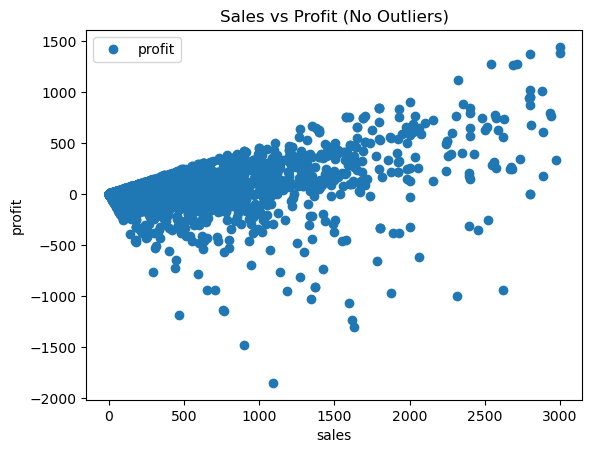

In [65]:
# Creating scatterplot using matplotlib for profit and total orders

no_outliers.plot(x='sales',y='profit',style='o')
plt.title('Sales vs Profit (No Outliers)')
plt.xlabel('sales')
plt.ylabel('profit')
plt.show()

In [79]:
# Reshaping variables into Numpy arrays and then putting into separate objects without outliers

X_no_outliers=no_outliers['sales'].values.reshape(-1,1)
y_no_outliers=no_outliers['profit'].values.reshape(-1,1)

In [80]:
X_no_outliers

array([[2.61960e+02],
       [7.31940e+02],
       [1.46200e+01],
       [9.57580e+02],
       [2.23700e+01],
       [4.88600e+01],
       [7.28000e+00],
       [9.07150e+02],
       [1.85000e+01],
       [1.14900e+02],
       [1.70618e+03],
       [9.11420e+02],
       [1.55500e+01],
       [4.07980e+02],
       [6.88100e+01],
       [2.54000e+00],
       [6.65880e+02],
       [5.55000e+01],
       [8.56000e+00],
       [2.13480e+02],
       [2.27200e+01],
       [1.94600e+01],
       [6.03400e+01],
       [7.13700e+01],
       [1.04463e+03],
       [1.16500e+01],
       [9.05700e+01],
       [9.62000e+00],
       [1.24200e+02],
       [3.26000e+00],
       [8.63000e+01],
       [6.86000e+00],
       [1.57600e+01],
       [2.94700e+01],
       [1.09754e+03],
       [1.90920e+02],
       [1.13330e+02],
       [5.32400e+02],
       [2.12060e+02],
       [3.71170e+02],
       [1.47170e+02],
       [7.78800e+01],
       [9.56200e+01],
       [4.59800e+01],
       [1.74600e+01],
       [2.

In [81]:
y_no_outliers

array([[ 4.19100e+01],
       [ 2.19580e+02],
       [ 6.87000e+00],
       [-3.83030e+02],
       [ 2.52000e+00],
       [ 1.41700e+01],
       [ 1.97000e+00],
       [ 9.07200e+01],
       [ 5.78000e+00],
       [ 3.44700e+01],
       [ 8.53100e+01],
       [ 6.83600e+01],
       [ 5.44000e+00],
       [ 1.32590e+02],
       [-1.23860e+02],
       [-3.82000e+00],
       [ 1.33200e+01],
       [ 9.99000e+00],
       [ 2.48000e+00],
       [ 1.60100e+01],
       [ 7.38000e+00],
       [ 5.06000e+00],
       [ 1.56900e+01],
       [-1.02000e+00],
       [ 2.40260e+02],
       [ 4.22000e+00],
       [ 1.17700e+01],
       [-7.05000e+00],
       [ 1.55300e+01],
       [ 1.10000e+00],
       [ 9.71000e+00],
       [-5.72000e+00],
       [ 3.55000e+00],
       [ 9.95000e+00],
       [ 1.23470e+02],
       [-1.47960e+02],
       [ 3.54200e+01],
       [-4.69800e+01],
       [-1.51500e+01],
       [ 4.17600e+01],
       [ 1.65600e+01],
       [ 3.89000e+00],
       [ 9.56000e+00],
       [ 1.

In [82]:
# Splitting data into a no outliers training and test sets 

X_train_no_outliers,X_test_no_outliers,y_train_no_outliers,y_test_no_outliers=train_test_split(X_no_outliers,y_no_outliers,test_size=0.3,random_state=0)

In [83]:
# Creating regression object to fit no outliers training set

regression_no_outliers=LinearRegression()

In [84]:
# Fitting regression object to no outliers training set

regression_no_outliers.fit(X_train_no_outliers,y_train_no_outliers)

LinearRegression()

In [85]:
# Predicting values of y using x for no outliers

y_predicted_no_outliers=regression_no_outliers.predict(X_test_no_outliers)

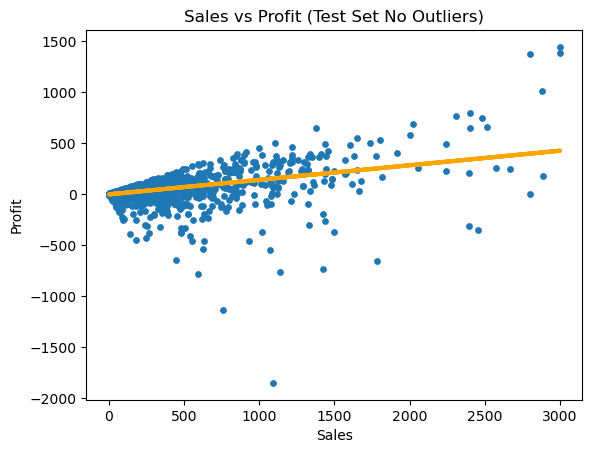

In [86]:
# Creating plot to show regression line from model on test set for no outliers

plot_test_no_outliers=plt
plot_test_no_outliers.scatter(X_test_no_outliers,y_test_no_outliers,s=15)
plot_test_no_outliers.plot(X_test_no_outliers,y_predicted_no_outliers,color='orange',linewidth=3)
plot_test_no_outliers.title('Sales vs Profit (Test Set No Outliers)')
plot_test_no_outliers.xlabel('Sales')
plot_test_no_outliers.ylabel('Profit')
plot_test_no_outliers.show()

In [87]:
# Creating objects containing model summary statistics for no outliers

rmse_no_outliers=mean_squared_error(y_test_no_outliers,y_predicted_no_outliers)
r2_no_outliers=r2_score(y_test_no_outliers,y_predicted_no_outliers)

In [88]:
# Model summary statistic results to evaluate model performance for not outliers

print('Slope:',regression_no_outliers.coef_)
print('Mean squared error:',rmse_no_outliers)
print('R2 score:',r2_no_outliers)

Slope: [[0.14248349]]
Mean squared error: 9883.835138273475
R2 score: 0.20726794933964687


In [90]:
y_predicted_no_outliers

array([[-1.30793363e+00],
       [ 1.67432992e+01],
       [ 1.14984820e+01],
       [ 6.48876270e+00],
       [ 1.17127902e+00],
       [ 2.83172327e+01],
       [ 2.11959081e+01],
       [ 2.68464599e+02],
       [-2.31671671e+00],
       [ 4.10125112e+01],
       [-1.73538409e+00],
       [ 1.58544289e+02],
       [ 1.61804894e+01],
       [ 1.46421794e+02],
       [-3.77574760e+00],
       [-2.18705674e+00],
       [ 8.15462132e+01],
       [ 2.31353350e+02],
       [ 3.00284593e+01],
       [ 3.89208537e+01],
       [-3.03768315e+00],
       [ 1.00836210e+01],
       [ 8.18853239e+01],
       [ 8.65593651e+00],
       [-3.60761709e+00],
       [ 1.86055583e+01],
       [-2.81683375e+00],
       [ 1.94211467e+00],
       [ 6.44168486e+01],
       [ 1.99249554e+01],
       [ 1.78097298e+02],
       [ 2.91443385e-03],
       [ 1.05541857e+02],
       [ 2.35240882e+01],
       [ 1.86169570e+01],
       [ 1.63714173e+01],
       [ 1.44991843e+01],
       [-2.03459941e+00],
       [ 5.4

In [91]:
# dataframe comparing actual and predicted values of y for no outliers

y_actual_predicted_comparison_no_outliers=pd.DataFrame({'Actual':y_test_no_outliers.flatten(),'Predicted':y_predicted_no_outliers.flatten()})
y_actual_predicted_comparison_no_outliers.head(30)

,Actual,Predicted
0,8.82,-1.307934
1,2.93,16.743299
2,53.86,11.498482
3,23.92,6.488763
4,11.70,1.171279
5,36.47,28.317233
6,-453.85,21.195908
7,401.81,268.464599
8,6.35,-2.316717
9,-18.12,41.012511


### No Outliers Result Analysis of test set
1) Slope: showed a positive relationship that as sales rise, profits generally rise.
2) Mean squared error: The resulted based on a subset without outliers, the MSE should be acceptable. This was also determined when looking at the RSME which should be around 99.42.
3) R2 Score: Even with outliers removed, the R2 score showed only a 20%, still showing the model to not be a perfect fit for the data representation.

### 6) Comparing Regression Fit to training set (With Outliers)

In [92]:
# As removing outliers during the testing phase did not result in much difference, I will be using dataframe as whole as sales are legitimate despite outliers.

y_predicted_train=regression.predict(X_train)

In [95]:
rmse_train=mean_squared_error(y_train,y_predicted_train)
r2_train=r2_score(y_train,y_predicted_train)

In [96]:
print('Slope:',regression.coef_)
print('Mean squared error:',rmse)
print('R2 score: ',r2_train)

Slope: [[0.13446275]]
Mean squared error: 39534.39574538261
R2 score:  0.14652054023232797


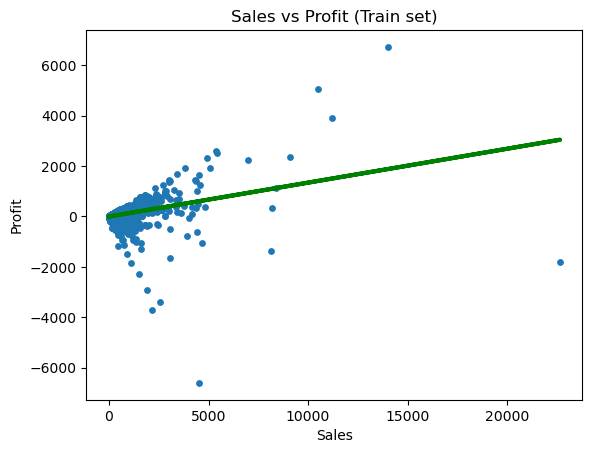

In [99]:
# Graphing the training set results.

plot_test_train = plt
plot_test_train.scatter(X_train, y_train,s = 15)
plot_test_train.plot(X_train, y_predicted_train, color='green', linewidth =3)
plot_test_train.title('Sales vs Profit (Train set)')
plot_test_train.xlabel('Sales')
plot_test_train.ylabel('Profit')
plot_test_train.show()

### Train Set Results Analysis
1) Slope: shows a positive relationship at that as sales increase, profit generally increase at 0.13446275.
2) Mean squared error: This result appears to be within acceptable means based on the sale figure data and when comparing based on the RMSE it was found at 198.83.
3) R2 Score: This result is still appearing to be low at only 14.65% and therefore the model is not portraying a large portion of the variation in profit. Based on this, we can see that other factors are also likely influencing profit.

### 7) Thoughts on Model Performance
#### The model shows that there is not a strong positive relationship between the two variables due to the low R2 score of 14.65% indicating there is not much explaination in the variability in profit. The RMSE of 198.83 appears to be within acceptable ranges, but is the overall precision is limited. 
#### The model could potentially be suffering from data bias in such regards as sample bias in that the data may not be representative of the company's full range of sales and is limited to certain timeframe sales. I think this could be affecting the model to get a full grasp of the sales condition of the company and have thus generalized the data model.